# Recognizing Traffic Signs
The goal of this project is to build a model capable of determining the type of traffic sign that is displayed in an image captured under different real-life conditions and showing obstructions, poor lighting, or even the sign being far away from the camera. We provide you with labeled images already splited in three files (tran/val/test) and a predefined list of signs to recognise. 

In [1]:
# Download and unzip
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip 

--2022-10-28 21:43:12--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32074743 (31M) [application/zip]
Saving to: ‘dataroot/data_1.zip’

data_1.zip          100%[===================>]  30.59M   174MB/s    in 0.2s    

2022-10-28 21:43:13 (174 MB/s) - ‘dataroot/data_1.zip’ saved [32074743/32074743]

--2022-10-28 21:43:13--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.19

In [2]:
# Unzip
import zipfile
with zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

In [3]:
# Load sign names
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
signnames

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [4]:
# Load images
import pickle
signimages = pickle.load( open( dataroot+"train.p", "rb" ) )
signimages_test = pickle.load( open( dataroot+"test.p", "rb" ) )
signimages_val = pickle.load( open( dataroot+"valid.p", "rb" ) )


The image shows a Turn left ahead sign


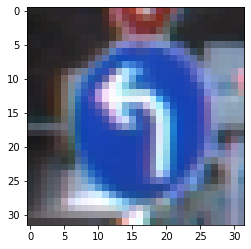

In [5]:
# Preview image
import matplotlib.pyplot as plt
import numpy as np
import cv2

inx = 20123
plt.imshow(signimages['features'][inx])
print("The image shows a {} sign".format(signnames[signimages['labels'][inx]]))

Las imágenes son de 32x32x3 ya que es RGB.
Por lo tanto cada imagen está representada por 3072 elementos.

Se transforma la matriz de 32x32x3 en un vector de 3072

In [14]:
X= np.zeros([len(signimages['features']), 32*32*3])
for i in range(len(signimages['features'])):
  # input= np.array([32,32,3], dtype="uint8")
  input= np.array(signimages['features'][i])
  X[i]= input.flatten('C')


In [15]:
len(signimages['features'])

34799

In [16]:
input= np.array(signimages['features'][0])


In [17]:
input_flat=input.flatten('F')
input_flat.shape

(3072,)

In [18]:
signimages['features'][0][0][0][0]

28

In [19]:
X.shape

(34799, 3072)

Cargo las características de la imágen de entrenamiento en X_train y en y_train cargo las etiquetas

In [21]:
X_train= X
y_train= np.array(signimages['labels'])

In [22]:
X_train.shape, y_train.shape

((34799, 3072), (34799,))

De Forma analoga hago lo mismo con los datos de Test y de Validación

In [23]:
X_test= np.zeros([len(signimages_test['features']), 32*32*3])
for i in range(len(signimages_test['features'])):
  # input= np.array([32,32,3], dtype="uint8")
  input= np.array(signimages_test['features'][i])
  X_test[i]= input.flatten('C')


In [24]:
X_val= np.zeros([len(signimages_val['features']), 32*32*3])
for i in range(len(signimages_val['features'])):
  # input= np.array([32,32,3], dtype="uint8")
  input= np.array(signimages_val['features'][i])
  X_val[i]= input.flatten('C')

In [25]:
X_test.shape, X_val.shape

((12630, 3072), (4410, 3072))

In [26]:
y_test= np.array(signimages_test['labels'])
y_val= np.array(signimages_val['labels'])

In [27]:
y_test.shape, y_val.shape

((12630,), (4410,))

Normalizo las variables entre 0 y 1

In [28]:
X_train= X_train/255
X_test= X_test/255
X_val= X_val/255


In [79]:
from sklearn.neural_network import MLPClassifier

In [34]:
from sklearn import preprocessing

Como las imagenes fueron tomadas en diferentes condiciones de luz, se normaliza las imagenes.
StandarScaler, resta el promedio, y escala la varianza a 1.

In [35]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [39]:
X_scaled = scaler.transform(X_train)

Creo un clasificador de Perceptron multicapa.
En este caso creo 3 capas, con 256 neuronas cada uno.
Defino la cantidad de epocas en 100
Uso la activación RELU.
Como optimizador, utilizo ADAM
Utilizo como tasa de aprendizaje 0.001

In [48]:
mlp = MLPClassifier(
    hidden_layer_sizes=(256,3),
    max_iter=100,
    activation='relu',
    alpha=1e-4,
    solver="adam",
    verbose=True,
    random_state=13,
    learning_rate_init=0.001,
)

Entreno el modelo

In [49]:
mlp.fit(X_scaled, y_train)

Iteration 1, loss = 3.42020530
Iteration 2, loss = 2.63884415
Iteration 3, loss = 2.18882123
Iteration 4, loss = 1.89805977
Iteration 5, loss = 1.64353725
Iteration 6, loss = 1.42273827
Iteration 7, loss = 1.26434809
Iteration 8, loss = 1.19178110
Iteration 9, loss = 1.07464335
Iteration 10, loss = 0.99913947
Iteration 11, loss = 0.91733220
Iteration 12, loss = 0.88770849
Iteration 13, loss = 0.84009396
Iteration 14, loss = 0.80100468
Iteration 15, loss = 0.74980334
Iteration 16, loss = 0.71487752
Iteration 17, loss = 0.71206374
Iteration 18, loss = 0.67507431
Iteration 19, loss = 0.64738933
Iteration 20, loss = 0.60242317
Iteration 21, loss = 0.59917810
Iteration 22, loss = 0.56613605
Iteration 23, loss = 0.56831694
Iteration 24, loss = 0.53444359
Iteration 25, loss = 0.54520539
Iteration 26, loss = 0.53135508
Iteration 27, loss = 0.56242460
Iteration 28, loss = 0.48886438
Iteration 29, loss = 0.43868390
Iteration 30, loss = 0.45286653
Iteration 31, loss = 0.45853977
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(256, 3), max_iter=100, random_state=13,
              verbose=True)

Si bien se configuraron 100 épocas, el programa canceló el entrenamiento en la épocas 80, porque no encontró ninguna disminución del las pérdidas en el últimas 10 iteraciones
Tambíen uso el StandardScaler en el set de test.

In [50]:
scaler_test = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

Con best_loss_ puedo observar le pérdidas más baja que obtuve con el modelo.


In [51]:
mlp.best_loss_

0.2148446141896101

Grafico como evolucionó las pérdidas respecto a las épocas

Text(0.5, 0, 'Epocas')

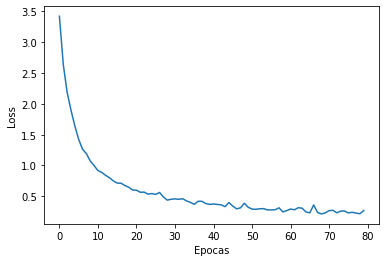

In [52]:
plt.plot(mlp.loss_curve_)
plt.ylabel("Loss")
plt.xlabel("Epocas")

Evaluo la pecisión del test de evaluación.
Casi el 70% de la predicciones son correctas.

In [53]:
mlp.score(X_test_scaled, y_test)

0.6943784639746635

In [56]:
y_test_pred= mlp.predict(X_test_scaled)

In [54]:
mlp.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

Además, se evalua la matriz de confusión

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_test,y_test_pred)

array([[ 26,  20,   1, ...,   0,   0,   0],
       [  2, 547, 101, ...,   0,   0,   0],
       [  0,  57, 601, ...,   0,   0,   0],
       ...,
       [  0,   4,   0, ...,  29,   5,   1],
       [  0,   0,   0, ...,  17,   5,  13],
       [  0,   0,   0, ...,   1,  19,  54]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


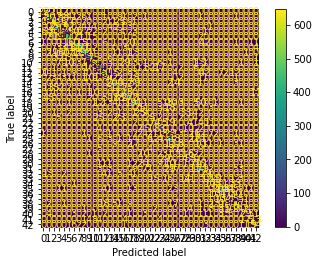

In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp, X_test_scaled,y_test) 

Se toman algunas imágenes de ejemplo, y se observa como son predichas por el modelo.

In [66]:
y_test_pred= mlp.predict(X_test_scaled)

The image shows a Speed limit (70km/h) sign
El MPL la detecta como: Speed limit (50km/h)


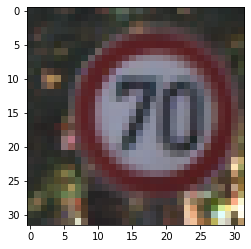

In [75]:
inx = 2023
plt.imshow(signimages_test['features'][inx])
print("The image shows a {} sign".format(signnames[signimages_test['labels'][inx]]))
print("El MPL la detecta como: "+ signnames[y_test_pred[inx]])

The image shows a No passing sign
El MPL la detecta como: No passing


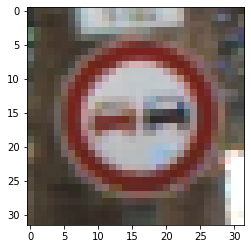

In [76]:
inx = 8023
plt.imshow(signimages_test['features'][inx])
print("The image shows a {} sign".format(signnames[signimages_test['labels'][inx]]))
print("El MPL la detecta como: "+ signnames[y_test_pred[inx]])

The image shows a Speed limit (70km/h) sign
El MPL la detecta como: Speed limit (70km/h)


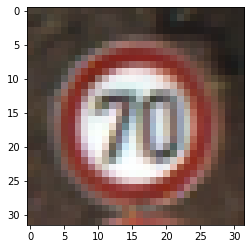

In [77]:
inx = 10023
plt.imshow(signimages_test['features'][inx])
print("The image shows a {} sign".format(signnames[signimages_test['labels'][inx]]))
print("El MPL la detecta como: "+ signnames[y_test_pred[inx]])

The image shows a Keep right sign
El MPL la detecta como: Keep right


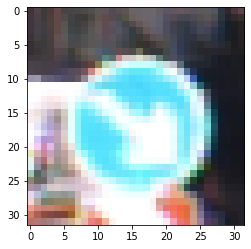

In [78]:
inx = 1024
plt.imshow(signimages_test['features'][inx])
print("The image shows a {} sign".format(signnames[signimages_test['labels'][inx]]))
print("El MPL la detecta como: "+ signnames[y_test_pred[inx]])

Para mejorar la clasificación, se podría trabajar sobre el centrado de las imágenes. Ya que algunas se encuentran corridas.
Además, se podrían evaluar diferentes configuraciones de cantidad de neuronas y capas. Pero al hacer esto, estoy haciendo más lento el entrenamiento.

También se podría evaluar los hiperametros con gridsearcCV, explorando las distintas activaciones (Relu, TanH, etc.), los distintos métodos de optimización (SGD, ADAM), y también diferentes tasas de aprendizaje (por ejemplo 0.1, 0.01, 0.001).

Vale la pena aclarar, que el conjunto de Validación no fue utilizado, ya que la función mlpclassifier de Sklearn, no permite ingresar el dataset de validación
